In [103]:
import glob
import os
from lsst import afw
print(afw.version.__version__)
from lsst.daf.persistence import Butler
from lsst.eotest.sensor import MaskedCCD, makeAmplifierGeometry
import numpy

from exploreRun import exploreRun
from lsst.eo_utils.base.image_utils import get_ccd_from_id,\
    get_amp_list, get_data_as_read, sort_sflats

from lsst.eo_utils.base.data_access import get_data_for_run

import lsst.eotest.image_utils as imutil
import pylab

from astropy.io import fits
from astropy.stats import mad_std
import numpy
%matplotlib inline

20.0.0-4-gde602ef96


In [104]:
# setting up file paths we're looking at, for QE flats
# NOW looking at Raft 14, CCD 21, run 10928 (must be a good run)

superbiaspath = "/gpfs/slac/lsst/fs1/u/echarles/DATA/analysis/ts8/superbias/RTM-014/RTM-014-10928-S21_superbias_normal.fits"
superdarkpath = "/gpfs/slac/lsst/fs1/u/echarles/DATA/analysis/ts8/superdark/RTM-014/RTM-014-10928-S21_superdark_normal.fits"
qeflatpath = glob.glob("/gpfs/slac/lsst/fs3/g/data/jobHarness/jh_stage/LCA-11021_RTM/LCA-11021_RTM-014/10928/qe_raft_acq/v0/84753/S21/*_lambda_flat_*")

qeflatpath.sort()

In [105]:
wls = numpy.array([ get_ccd_from_id(None, aqeflatpath, []).md.md["MONOWL"] for aqeflatpath in qeflatpath ])

In [106]:
!wget -O filter_curves.fits https://www.sdss.org/wp-content/uploads/2017/04/filter_curves.fits

--2020-07-09 21:15:09--  https://www.sdss.org/wp-content/uploads/2017/04/filter_curves.fits
Resolving www.sdss.org (www.sdss.org)... 128.220.233.141
Connecting to www.sdss.org (www.sdss.org)|128.220.233.141|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34560 (34K) [image/fits]
Saving to: ‘filter_curves.fits’

100%[======================================>] 34,560      --.-K/s   in 0.07s   

2020-07-09 21:15:10 (519 KB/s) - ‘filter_curves.fits’ saved [34560/34560]



Text(0.5, 0, 'Angstrom')

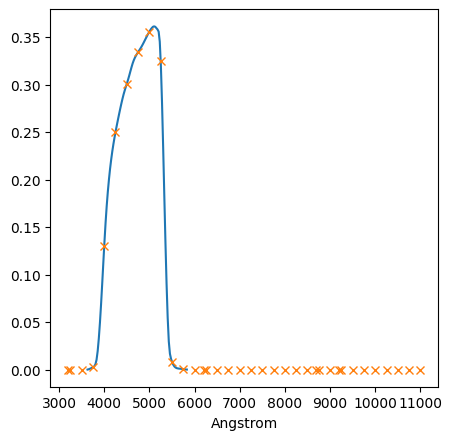

In [107]:
fig, axs = pylab.subplots(figsize=(5,5),dpi=100) 

# [('wavelength', '>f4'), ('respt', '>f4'), ('resbig', '>f4'), ('resnoa', '>f4'), ('xatm', '>f4')]

sdssfilter = fits.open("filter_curves.fits")
# look a filter 2 again, blue
pylab.plot(sdssfilter[2].data["wavelength"],sdssfilter[2].data["respt"])
weights = numpy.interp(wls*10,sdssfilter[2].data["wavelength"],sdssfilter[2].data["respt"])
pylab.plot(wls*10,weights,"x")
pylab.xlabel("Angstrom")

In [108]:
# load other flat data
'''
superbiaspath_13 = "/gpfs/slac/lsst/fs1/u/echarles/DATA/analysis/ts8/superbias/RTM-013/RTM-013-10982-S21_superbias_normal.fits"
superdarkpath_13 = "/gpfs/slac/lsst/fs1/u/echarles/DATA/analysis/ts8/superdark/RTM-013/RTM-013-10982-S21_superdark_normal.fits"
qeflatpath_13 = glob.glob("/gpfs/slac/lsst/fs3/g/data/jobHarness/jh_stage/LCA-11021_RTM/LCA-11021_RTM-013/10982/qe_raft_acq/v0/85192/S21/*_lambda_flat_*")
qeflatpath_13.sort()

'''

'\nsuperbiaspath_13 = "/gpfs/slac/lsst/fs1/u/echarles/DATA/analysis/ts8/superbias/RTM-013/RTM-013-10982-S21_superbias_normal.fits"\nsuperdarkpath_13 = "/gpfs/slac/lsst/fs1/u/echarles/DATA/analysis/ts8/superdark/RTM-013/RTM-013-10982-S21_superdark_normal.fits"\nqeflatpath_13 = glob.glob("/gpfs/slac/lsst/fs3/g/data/jobHarness/jh_stage/LCA-11021_RTM/LCA-11021_RTM-013/10982/qe_raft_acq/v0/85192/S21/*_lambda_flat_*")\nqeflatpath_13.sort()\n\n'

In [109]:
# wls_13 = numpy.array([ get_ccd_from_id(None, aqeflatpath_13, []).md.md["MONOWL"] for aqeflatpath_13 in qeflatpath_13 ])

In [110]:
'''

fig, axs = pylab.subplots(figsize=(5,5),dpi=300) 

# [('wavelength', '>f4'), ('respt', '>f4'), ('resbig', '>f4'), ('resnoa', '>f4'), ('xatm', '>f4')]

sdssfilter = fits.open("filter_curves.fits")
# look a filter 2 again, blue
pylab.plot(sdssfilter[2].data["wavelength"],sdssfilter[2].data["respt"])
weights = numpy.interp(wls_13*10,sdssfilter[2].data["wavelength"],sdssfilter[2].data["respt"])
weights = numpy.interp(wls*10,sdssfilter[2].data["wavelength"],sdssfilter[2].data["respt"])

pylab.plot(wls*10,weights,"x")
pylab.plot(wls_13*10,weights,"x")
pylab.xlabel("Angstrom")

'''

'\n\nfig, axs = pylab.subplots(figsize=(5,5),dpi=300) \n\n# [(\'wavelength\', \'>f4\'), (\'respt\', \'>f4\'), (\'resbig\', \'>f4\'), (\'resnoa\', \'>f4\'), (\'xatm\', \'>f4\')]\n\nsdssfilter = fits.open("filter_curves.fits")\n# look a filter 2 again, blue\npylab.plot(sdssfilter[2].data["wavelength"],sdssfilter[2].data["respt"])\nweights = numpy.interp(wls_13*10,sdssfilter[2].data["wavelength"],sdssfilter[2].data["respt"])\nweights = numpy.interp(wls*10,sdssfilter[2].data["wavelength"],sdssfilter[2].data["respt"])\n\npylab.plot(wls*10,weights,"x")\npylab.plot(wls_13*10,weights,"x")\npylab.xlabel("Angstrom")\n\n'

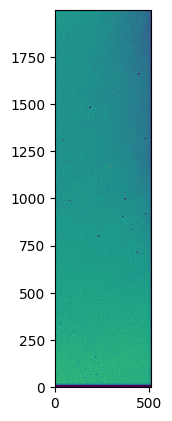

In [111]:

superdark = get_ccd_from_id(None, superdarkpath, [])     # load superdark, (but haven't used anywhere)
superbias = get_ccd_from_id(None, superbiaspath, [])     # load superbias

arr = []        # defines an empty array for storing new combined flat
ch = 1          # defines a channel we'll explore in the following:
for i, aqeflatpath in enumerate(qeflatpath):
    aqeflat = get_ccd_from_id(None, aqeflatpath, [], bias_frame=superbias)
    img = aqeflat.unbiased_and_trimmed_image(ch).getImage().array
    arr.append(img*weights[i])

# Let's see how the Combined flat looks 

# dpi changes size of image

fig, axs = pylab.subplots(figsize=(5,5),dpi=100) 
img = numpy.sum(arr,axis=0)/numpy.sum(weights)
mean = img.mean()
std = mad_std(img)
N = 3
pylab.imshow(img,vmin=mean-N*std,vmax=mean+N*std,origin="lower")

In [112]:
# FIND NEW CCOB SYNTHESIZED R & B FLATS



# CCOB flats from testing_making_flat_from_lambda

"""
fname = "/gpfs/slac/lsst/fs1/u/combet/DATA/CCOB_QE/fits/QE_R02_S21_red_-211.815_-0.395.fits"
ccob_red = get_ccd_from_id(None, fname, [])
print ( mad_std(get_data_as_read(ccob_red,ch,["imaging"])["imaging"]))
fname = "/gpfs/slac/lsst/fs1/u/combet/DATA/CCOB_QE/fits/QE_R02_S21_uv_-211.815_-0.395.fits"
ccob_blue = get_ccd_from_id(None, fname, [])
print ( mad_std(get_data_as_read(ccob_blue,ch,["imaging"])["imaging"]))
"""

# new CCOB flats produced a small and big number and then error in next cell ...
"""
fname = "/gpfs/slac/lsst/fs1/u/combet/DATA/CCOB_QE/fits/QE_R12_S02_red_-169.365_41.985.fits"
ccob_red = get_ccd_from_id(None, fname, [])
print ( mad_std(get_data_as_read(ccob_red,ch,["imaging"])["imaging"]))
fname = "/gpfs/slac/lsst/fs1/u/combet/DATA/CCOB_QE/fits/QE_R12_S02_uv_-169.365_41.985.fits"
ccob_blue = get_ccd_from_id(None, fname, [])
print ( mad_std(get_data_as_read(ccob_blue,ch,["imaging"])["imaging"]))
"""

# another set of new CCOB flats worked,  using these for rest of file
fname = "/gpfs/slac/lsst/fs1/u/combet/DATA/CCOB_QE/fits/QE_R20_S21_red_52.885_-264.175.fits"
ccob_red = get_ccd_from_id(None, fname, [])
print ( mad_std(get_data_as_read(ccob_red,ch,["imaging"])["imaging"]))
fname = "/gpfs/slac/lsst/fs1/u/combet/DATA/CCOB_QE/fits/QE_R20_S21_uv_52.885_-264.175.fits"
ccob_blue = get_ccd_from_id(None, fname, [])
print ( mad_std(get_data_as_read(ccob_blue,ch,["imaging"])["imaging"]))

# normalize flat 
red = get_data_as_read(ccob_red,ch,["imaging"])["imaging"]
blue = get_data_as_read(ccob_blue,ch,["imaging"])["imaging"]

# changed this normalization to blue!!
normedimg = img/img.mean()*blue.mean()


464.05449439225345
376.5809635004229


312.02406143135283
376.5809635004229
0.007309118209207611


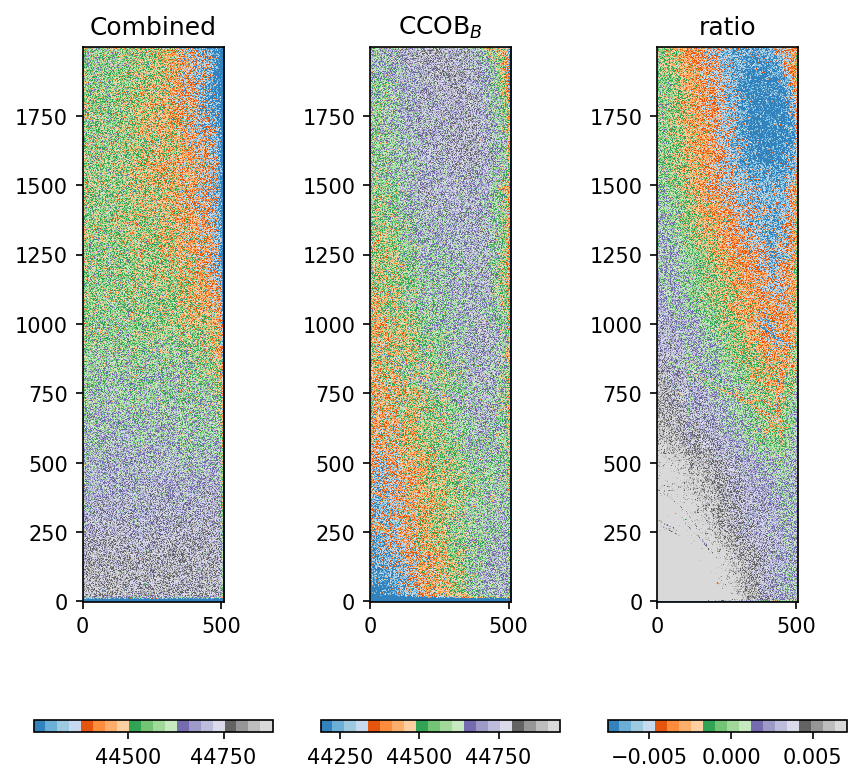

In [113]:
# change so CCOB B is displayed intstead of R

fig, axs = pylab.subplots(1,3,figsize=(7,7),dpi=150) 
for ax, animg, label in zip(axs,[normedimg, blue, (normedimg-blue)/blue], ["Combined",r"CCOB$_{B}$","ratio"]):
    mean = numpy.median(animg)
    std = mad_std(animg)
    N = 1
    ax.set_title(label)
    im = ax.imshow(animg,vmin=mean-N*std,vmax=mean+N*std,origin="lower",cmap=pylab.get_cmap("tab20c"))
    fig.colorbar( im, ax=ax, orientation="horizontal")
    print(std)

In [114]:
# to compare CCOB B vs. CCOB R vs. ratio ... same as in last notebook

'''
fig, axs = pylab.subplots(1,3,figsize=(7,7),dpi=150)
normedblue = blue/blue.mean()*red.mean()
for ax, animg, label in zip(axs,[normedblue, red, (normedblue-red)/red], [r"CCOB$_{B}$",r"CCOB$_{R}$","ratio"]):
    mean = numpy.median(animg)
    std = mad_std(animg)
    N = 1
    ax.set_title(label)
    im = ax.imshow(animg,vmin=mean-N*std,vmax=mean+N*std,origin="lower",cmap=pylab.get_cmap("tab20c"))
    fig.colorbar( im, ax=ax, orientation="horizontal")
    print(std)
'''

'\nfig, axs = pylab.subplots(1,3,figsize=(7,7),dpi=150)\nnormedblue = blue/blue.mean()*red.mean()\nfor ax, animg, label in zip(axs,[normedblue, red, (normedblue-red)/red], [r"CCOB$_{B}$",r"CCOB$_{R}$","ratio"]):\n    mean = numpy.median(animg)\n    std = mad_std(animg)\n    N = 1\n    ax.set_title(label)\n    im = ax.imshow(animg,vmin=mean-N*std,vmax=mean+N*std,origin="lower",cmap=pylab.get_cmap("tab20c"))\n    fig.colorbar( im, ax=ax, orientation="horizontal")\n    print(std)\n'

00   ITL-3800C-318_flat_0000.46s_flat1_10982_20190518181820.fits   97.145653
01   ITL-3800C-318_flat_0000.46s_flat2_10982_20190518181854.fits   99.588593
02   ITL-3800C-318_flat_0000.60s_flat1_10982_20190518181934.fits   133.725952
03   ITL-3800C-318_flat_0000.60s_flat2_10982_20190518181952.fits   134.553909
04   ITL-3800C-318_flat_0000.83s_flat1_10982_20190518182017.fits   184.569519
05   ITL-3800C-318_flat_0000.83s_flat2_10982_20190518182036.fits   188.143448
06   ITL-3800C-318_flat_0001.11s_flat1_10982_20190518182101.fits   249.883362
07   ITL-3800C-318_flat_0001.11s_flat2_10982_20190518182120.fits   249.577484
08   ITL-3800C-318_flat_0001.48s_flat1_10982_20190518182147.fits   334.078949
09   ITL-3800C-318_flat_0001.48s_flat2_10982_20190518182207.fits   339.267944
10   ITL-3800C-318_flat_0001.89s_flat1_10982_20190518182450.fits   984.470093
11   ITL-3800C-318_flat_0001.89s_flat2_10982_20190518182512.fits   981.888489
12   ITL-3800C-318_flat_0002.46s_flat1_10982_20190518182541.fits  

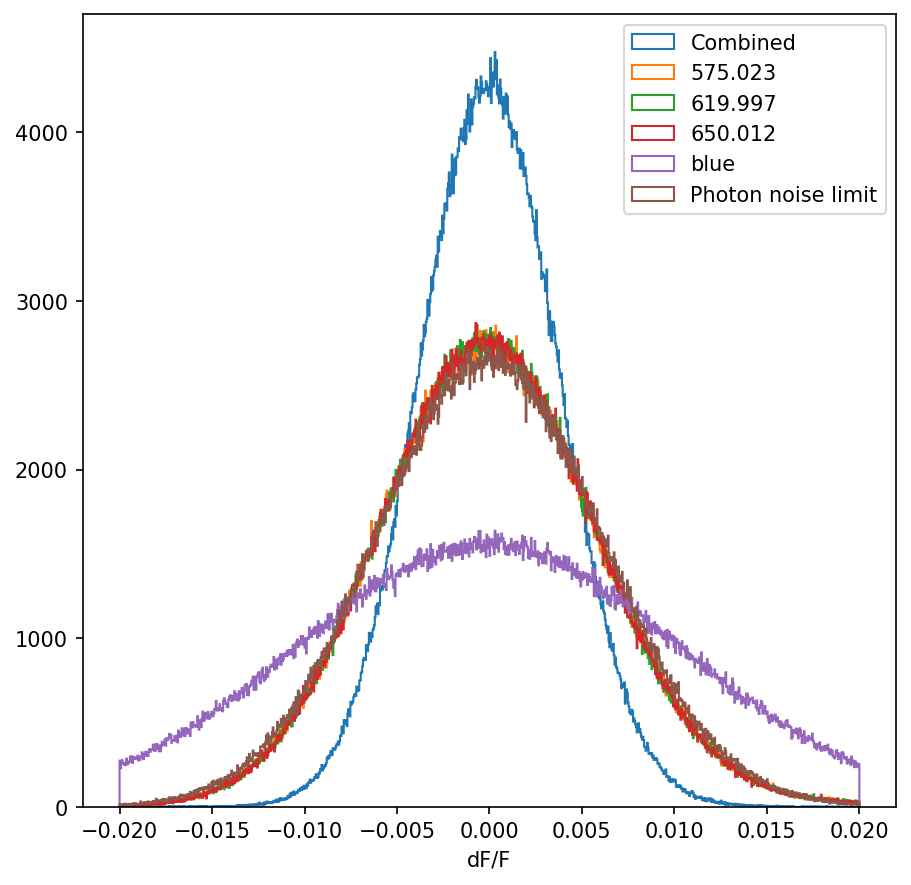

In [115]:
# create (uncertainty? fluctuation?) histogram

flatpairs = glob.glob("/gpfs/slac/lsst/fs3/g/data/jobHarness/jh_stage/LCA-11021_RTM/LCA-11021_RTM-013/10982/flat_pair_raft_acq/v0/85183/S21/ITL-3800C-318_flat_*_flat?*.fits")
flatpairs.sort()
for i, aflatpair in enumerate(flatpairs):
    aqeflat = get_ccd_from_id(None, aflatpair, [], bias_frame=superbias)
    img = aqeflat.unbiased_and_trimmed_image(ch).getImage().array
    print("{:02d}   {}   {:05f}".format(i, os.path.basename(aflatpair), img.mean()))
    
    
    
fig, axs = pylab.subplots(1,1,figsize=(7,7),dpi=150)

def getonewl( num ):
    fname = qeflatpath[num]
    ccd_particular = get_ccd_from_id(None, fname, [])
    particular = get_data_as_read(ccd_particular,ch,["imaging"])["imaging"]
    normedparticular = particular/particular.mean()*red.mean()
    return normedparticular.flatten(),  ccd_particular.md.md["MONOWL"]

for anarray, label in [
            ( normedimg.flatten(), "Combined" ),
            getonewl(11),
            getonewl(13),
            getonewl(15),
            ( normedblue.flatten(), "blue" ),
#            ( red.mean(), r"$\langle {\rm red}\rangle$-red" )    
    ]:
    arr = (anarray-red.flatten())/red.flatten()
    pylab.hist(arr-numpy.median(arr),
               bins=1000,range=(-0.02,0.02),histtype="step",label=label)
#30,31   #20k
#52,53   #60k
#76,77
a=get_ccd_from_id(None, flatpairs[30], [], bias_frame=superbias).unbiased_and_trimmed_image(ch).getImage().array # one of flat pairs which have almost same flux level as R. (~20k)
b=get_ccd_from_id(None, flatpairs[31], [], bias_frame=superbias).unbiased_and_trimmed_image(ch).getImage().array
rand = ( a-b ).flatten()/(b.flatten())/numpy.sqrt(2)
pylab.hist(
    rand-numpy.median(rand),
    bins=1000,range=(-0.02,0.02),histtype="step",label="Photon noise limit"
)
pylab.xlabel("dF/F")
pylab.legend()

312.02406143135283
376.5809635004229
0.007309118209207611


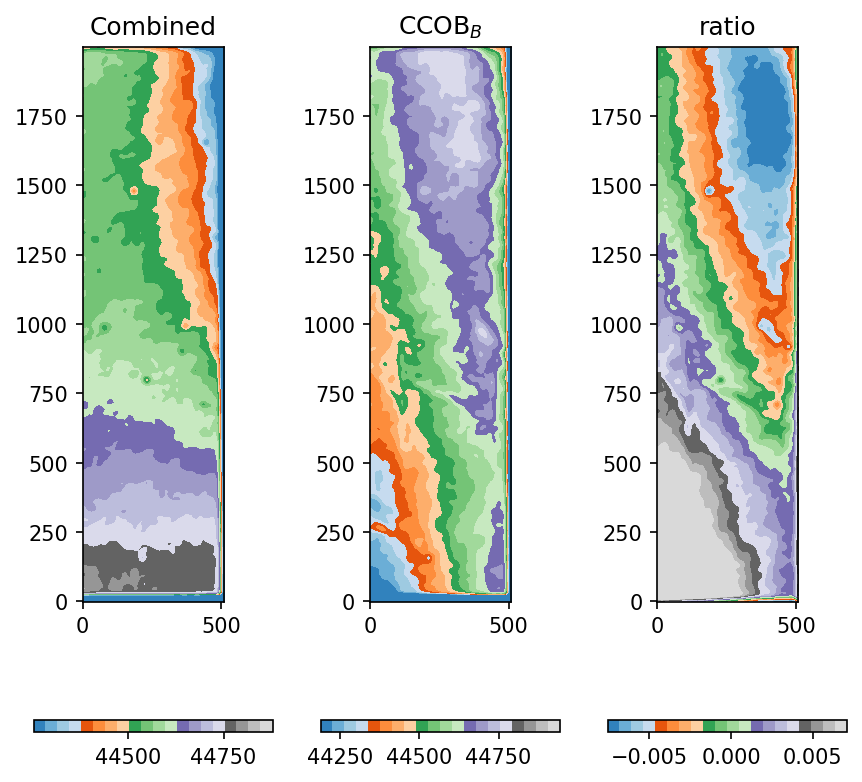

In [116]:
# comparing against CCOBb


from scipy.ndimage import gaussian_filter

sigma=10
N = 1

fig, axs = pylab.subplots(1,3,figsize=(7,7),dpi=150) 
for ax, animg, label in zip(axs,[normedimg, blue, (normedimg-blue)/blue], ["Combined",r"CCOB$_{B}$","ratio"]):
    mean = numpy.median(animg)
    std = mad_std(animg)
    ax.set_title(label)
    im = ax.imshow(gaussian_filter(animg,sigma=sigma),vmin=mean-N*std,vmax=mean+N*std,origin="lower",cmap=pylab.get_cmap("tab20c"))
    fig.colorbar( im, ax=ax, orientation="horizontal")
    print(std)

312.02406143135283
464.05449439225345
0.0037958882447957326


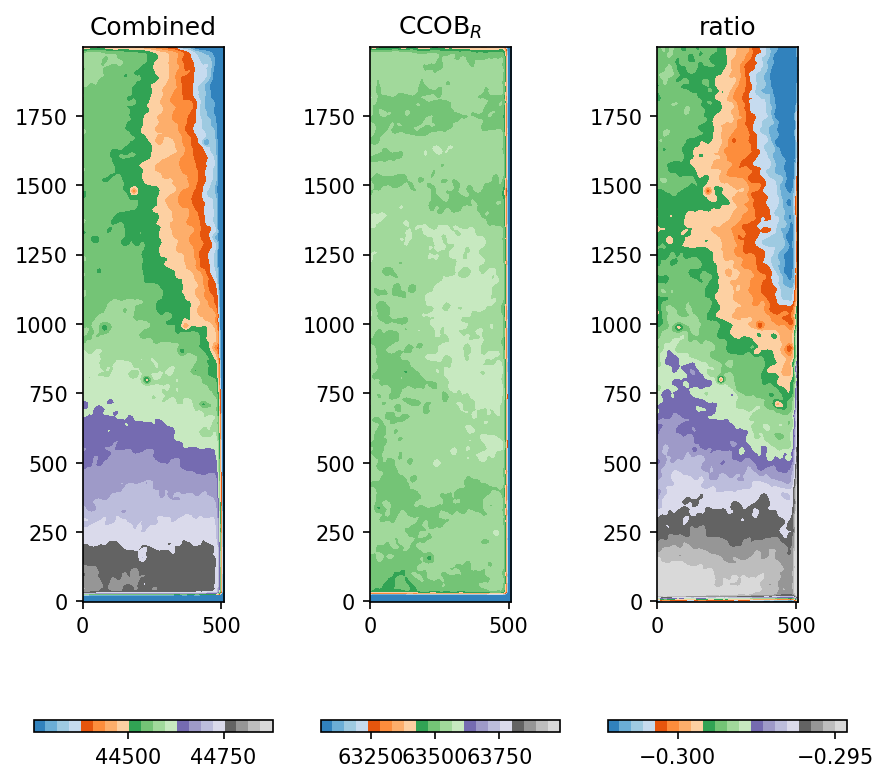

In [117]:
# comparing against CCOBr

sigma=10
N = 1

fig, axs = pylab.subplots(1,3,figsize=(7,7),dpi=150) 
for ax, animg, label in zip(axs,[normedimg, red, (normedimg-red)/red], ["Combined",r"CCOB$_{R}$","ratio"]):
    mean = numpy.median(animg)
    std = mad_std(animg)
    ax.set_title(label)
    im = ax.imshow(gaussian_filter(animg,sigma=sigma),vmin=mean-N*std,vmax=mean+N*std,origin="lower",cmap=pylab.get_cmap("tab20c"))
    fig.colorbar( im, ax=ax, orientation="horizontal")
    print(std)

0.25%
0.15%
0.12%
0.12%
0.3%
0.3%


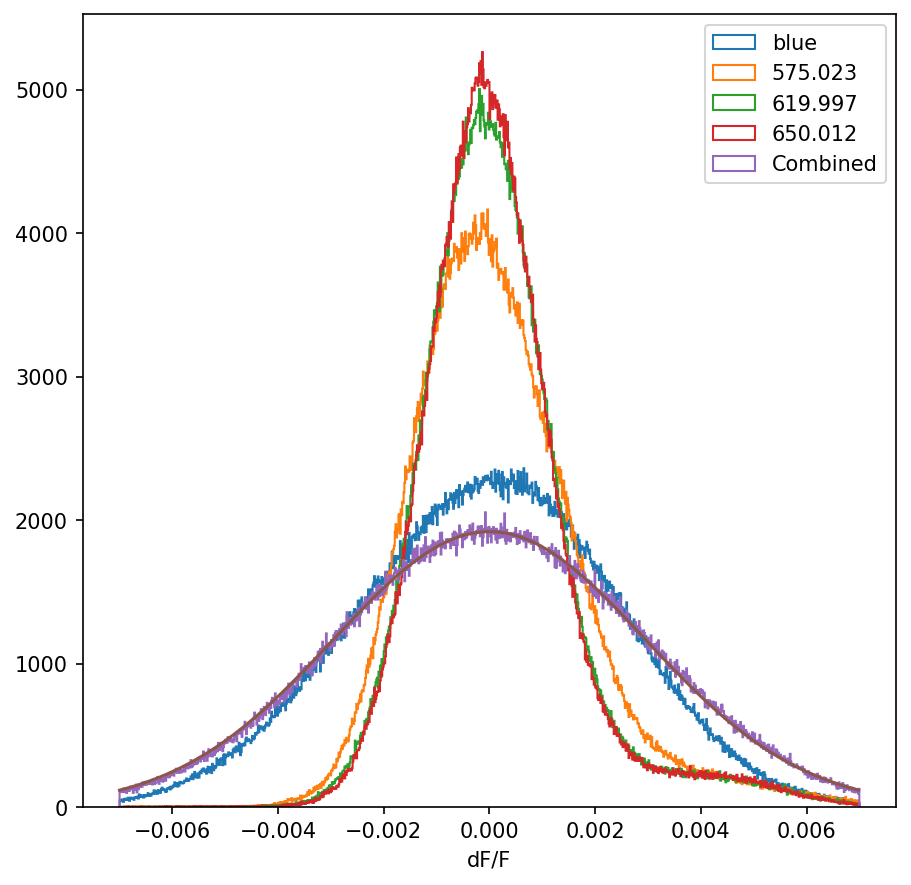

In [118]:

from scipy import signal


fig, axs = pylab.subplots(1,1,figsize=(7,7),dpi=150)

range = (-0.007,0.007)
nbins = 1000
for anarray, label in [
            ( normedblue.flatten(), "blue" ),
#            ( normedimg.flatten(), "Combined" ),
            getonewl(11),
            getonewl(13),
            getonewl(15),
            ( normedimg.flatten(), "Combined" ),    
#            ( red.mean(), r"$\langle {\rm red}\rangle$-red" )    
    ]:
    arr = gaussian_filter(anarray-red.flatten(),sigma=sigma)/red.flatten()
    s = mad_std(arr)
    print("{:.2}%".format(s*100))    
    pylab.hist(arr-numpy.median(arr),
               bins=nbins,range=range,histtype="step",label=label)
dx= (range[-1]-range[0])/nbins
x = numpy.arange(*range,dx)
s = mad_std(arr)
y = numpy.exp(-x**2/(2*s**2))/numpy.sqrt(2*numpy.pi*s**2)*dx*arr.shape[0]
print("{:.2}%".format(s*100))
pylab.plot(x,y)
pylab.xlabel("dF/F")
pylab.legend()